In [96]:
import scipy.io as sc
faces = sc.loadmat('face.mat')

In [97]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
faces_content = sio.loadmat('face.mat')
faces_content

{'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

[[221  99  58 ...  93 227 100]
 [225 100  58 ...  95 232 102]
 [226 100  57 ...  81 235 132]
 ...
 [ 79 114 167 ...  88  43  44]
 [ 78 118 171 ... 100  45  44]
 [ 80 120 171 ...  91  46  47]]
[[38 40  6 28  7 41 32 24  8 22  1 44 36 30 32 51 48 17  1 25 46  1 42 47
  23 33 18 33 20 15 13 46  6 20 42 44 52 42 28  6 50 22  4 39 30 21 20  6
   8  3 22  1 46 43 40  1 15 27 14 22 13  3  7  3 48  2 18 41 48 20  7 52
  26  9 38 32 19 51 49 17 51 40 21 23 34 51  6 20 25 31 36 17 11 34  7 37
  19 46 47 32  9 44 35 42 10 52 49 46 30 10  2 35 20 15 16 16 50 51 17  9
  25 29  7 33 32 15 11 42  1 44 23  2 15 28 52  4 12 49 11 28 33 18 27 12
  17 45 13 41 12 38 37 35 14 37 26 30 41 42 26 24 14  4 51  5  7 20 29 48
  31 22  8  4 31  3 39 52 49 22  3 36 31 16 36 37 14 22 11 42 37 40 22 41
  19 22 45 21 24 26  7  3 22 31 23 13 12 17 45 42  5 28 46  8 33 34  2 29
  44 26 23 17  9 12 51 12 15 16  2 36 34 11 38 14 24 27 41 32 33 43 25 35
  41  2 33 30 27 23 41  1 37 13 29 29  8 19 44 51 28 30 50 19 48  9 

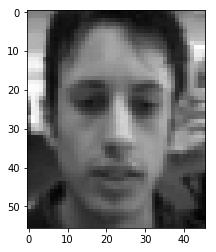

In [98]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import collections 
from itertools import groupby

face_data = faces_content['X']
face_id = faces_content['l']

X_train, X_test = train_test_split(face_data.T, test_size = 0.2, random_state = 0)
Y_train, Y_test = train_test_split(face_id.T, test_size = 0.2, random_state = 0)

face_train = X_train.T
face_train_id = Y_train.T
face_test = X_test.T
face_test_id = Y_test.T

print(face_train)
print(face_train_id)
print(face_test_id)

face_5 = np.reshape(face_train[:,27],(46,56))
plt.imshow(face_5.T, cmap = 'gist_gray')

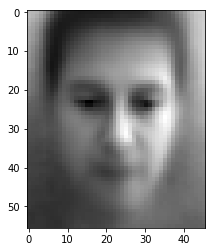

In [99]:
average_face=np.average(face_train.T, axis = 0)
face_aver = np.reshape(average_face,(46,56))
plt.imshow(face_aver.T, cmap = 'gist_gray')

average_face_test = np.average(face_test.T, axis = 0)

In [100]:
norm_face_t = face_train.T - average_face.T
norm_face = norm_face_t.T

In [101]:
N=416
print (norm_face.shape)
S = np.dot(norm_face,norm_face.T)/N

(2576, 416)


In [102]:
eigvals, eigvecs = np.linalg.eig(S)


In [103]:
eigvecs_float = eigvecs.astype('float64')

/Users/adilzhannussipzhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [125]:
M=415
PCA = np.array([eigvecs[:,i] for i in range (M)])
Wn = np.dot(norm_face.T, PCA.T)

In [126]:
face_test_n_transform = face_test.T - average_face_test.T
face_test_n = face_test_n_transform.T

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print(Wn.shape)
print(face_train_id.ravel().shape)

classifier = KNeighborsClassifier(n_neighbors = 1) #setting up NN\

face_test_pca = np.dot(face_test_n.T, PCA.T)  #applying PCA to test set as well
classifier.fit(Wn, face_train_id.ravel())  #fitting data
face_predict = classifier.predict(face_test_pca.real)
print(face_test_pca.shape)

accuracy_score(face_predict, face_test_id.ravel())  #checking accuracy

(416, 415)
(416,)
(104, 415)


/Users/adilzhannussipzhan/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0.5576923076923077

## PCA-LDA

In [128]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
Wn_s = sc.fit_transform(Wn.real)  
face_test_pca = sc.transform(face_test_pca)

/Users/adilzhannussipzhan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/Users/adilzhannussipzhan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype complex128 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [135]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=20)  
print(Wn_s)
Wn_lda = lda.fit_transform(Wn_s, face_train_id.ravel())   #applying LDA to the PCA data
print(Wn_lda.shape)
face_test_pca_lda = lda.transform(face_test_pca)
print(face_test_pca_lda.shape)

[[ 0.75104576 -0.45070296 -1.06962649 ... -0.38011049  1.64335142
   0.88801691]
 [-1.06036442 -0.20461915  1.27108314 ... -1.32755706  0.48179427
  -3.91630202]
 [ 1.2433521  -1.73289629  1.31555529 ...  1.73499714  0.3777863
   0.90730107]
 ...
 [ 1.27626914 -1.61734537 -0.19055479 ... -0.20279885 -0.50963552
   0.12069686]
 [-0.30196864  0.88643116 -0.51991868 ... -0.94360847  0.36825007
  -2.69244681]
 [ 0.27909702  1.71110697  0.71235797 ... -0.73398927  0.32422458
   1.2229722 ]]
(416, 20)
(104, 20)


/Users/adilzhannussipzhan/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [139]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)

classifier.fit(Wn_lda, face_train_id.ravel())
face_predict_pca_lda = classifier.predict(face_test_pca_lda)
accuracy_score(face_predict_pca_lda, face_test_id.ravel())  #checking accuracy


0.19230769230769232

## PCA-LDA Ensemble

In [140]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(face_train.T, face_train_id.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [141]:
dt.score(face_test.T, face_test_id.ravel())

0.3173076923076923

In [142]:
dt.score(face_train.T, face_train_id.ravel())

1.0

In [143]:
from sklearn.ensemble import BaggingClassifier

print(Wn)
#bg = BaggingClassifier(max_samples = 0.5, max_features = 1, bootstrap_features = True) 
#bg.fit(Wn, face_train_id.ravel())
#bg.score(Wn, face_train_id.ravel())

[[  734.66196408+0.j  -328.71364745+0.j  -721.52514079+0.j ...
     -5.37294946+0.j    23.27985521+0.j    12.38705199+0.j]
 [-1037.23294137+0.j  -149.23600386+0.j   857.41934515+0.j ...
    -18.76532503+0.j     6.82513834+0.j   -54.62895634+0.j]
 [ 1216.22881558+0.j -1263.86270588+0.j   887.4183891 +0.j ...
     24.52458444+0.j     5.3517527 +0.j    12.65604911+0.j]
 ...
 [ 1248.42778286+0.j -1179.58732141+0.j  -128.54026245+0.j ...
     -2.86660848+0.j    -7.21953987+0.j     1.68361464+0.j]
 [ -295.38129933+0.j   646.50567574+0.j  -350.71532587+0.j ...
    -13.33812327+0.j     5.21666159+0.j   -37.55725647+0.j]
 [  273.00861536+0.j  1247.9709877 +0.j   480.52678943+0.j ...
    -10.37510748+0.j     4.59299282+0.j    17.05938267+0.j]]


In [144]:
import random as r
def subsample(dataset, dataset_id, ratio=0.5):
    sample = list()
    sample_id = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = r.randrange(len(dataset))
        sample.append(dataset[index])
        sample_id.append(dataset_id[index])
    return sample, sample_id

In [146]:
b = []
b_im = []
b_id = []

print(Wn.shape)
for i in range (1,11):
    p = np.asarray(subsample(Wn, face_train_id.ravel()))
    im = p[0,:]
    id_ = p[1,:]
    b_im.append(im)
    b_id.append(id_)
bags_im = np.asarray(b_im)
bags_id = np.asarray(b_id)

images = []
for j in range (0,10):
    for i in range (0,208):
        bags_im[j,i].reshape(415,1)
        images.append(bags_im[j,i])
images = np.asarray(images)
print(images.shape)
print(bags_id.ravel().shape)

(416, 415)
(2080, 415)
(2080,)


In [154]:
def PCALDA (image, Mpca, Mlda, N):
    S = np.dot(image.T,image)/N
    eigvals, eigvecs = np.linalg.eig(S)
    PCA = np.array([eigvecs[:,i] for i in range (Mpca)])
    Wn = np.dot(image, PCA.T)
    return Wn

In [160]:
classifier = KNeighborsClassifier(n_neighbors = 1)

pca_lda_1 = PCALDA(images[:208,:], 123, 1, 208)
print(pca_lda_1.shape)

M=123
PCA = np.array([eigvecs[:,i] for i in range (M)])
face_test_n_1 = np.dot(face_test_n.T, PCA.T)

face_test_ensemble = np.dot(face_test_n_1, pca_lda_1.T)  #applying PCA to test set as well
classifier.fit(pca_lda_1, bags_id[0, :208].ravel())  #fitting data
face_predict_1 = classifier.predict(face_test_ensemble.real)


accuracy_score(face_predict_1, face_test_id.ravel())

(208, 123)


ValueError: Unknown label type: 'unknown'

In [541]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=30) 


bags_id=bags_id.astype('int')
bags_id_1 = bags_id[0,:208]
print(bags_id_1.shape)
images_1 = images[:208,:]

Wn_ensemble_lda = lda.fit_transform(images_1, bags_id_1.ravel())   #applying LDA to the PCA data
#face_test_after_bagging = np.dot(face_test_pca, PCA)
face_test_pca_lda_bag = lda.transform(face_test_pca)

print(Wn_ensemble_lda.shape)






(208,)
(208, 30)


/Users/Freshbox/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/Freshbox/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [543]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)

classifier.fit(Wn_ensemble_lda, bags_id_1.ravel())
face_predict_ensemble = classifier.predict(face_test_pca_lda_bag)
accuracy_score(face_predict_ensemble, face_test_id.ravel())  #checking accuracy

/Users/Freshbox/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/Freshbox/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


0.019230769230769232